In [21]:
# importing libraries to analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [22]:
# Reading the data from csv file
data = pd.read_csv("all_data.csv")
# Showing the first ten rows
data.head(10)
# There are four colums: Country (String), Year (integer) Life expectancy (float) and GDP (float). 

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


The name of life expectancy column is too large, to give it shorter just rename it

In [23]:
data.rename(columns = {'Life expectancy at birth (years)':'life_exp'}, inplace=True)
print(data.columns)

Index(['Country', 'Year', 'life_exp', 'GDP'], dtype='object')


In the first column there is a list with the names of countries, let's check it out those names.

In [24]:
print(data['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Similarly with the Year column, let's to see which years are included in the dataframe

In [25]:
print(data['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


To see the range of values of life expectancy and GDP we can use a histogram. The life expectancy histograms showes two groups, the first one has its range values between 45 and 60 an the second one between 70 to 80.

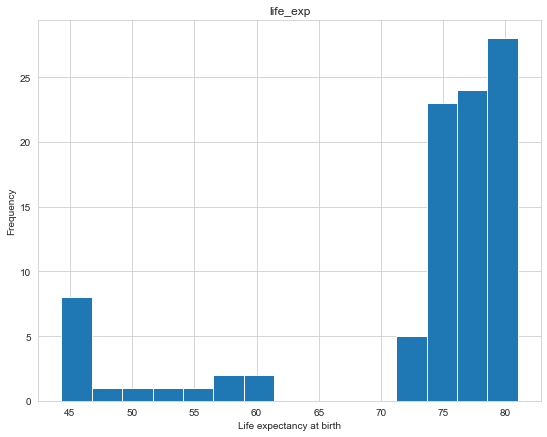

In [26]:
f, ax = plt.subplots(figsize = (9,7))
data.hist(column = 'life_exp', bins=15, ax = ax)
ax.set_xlabel('Life expectancy at birth')
ax.set_ylabel('Frequency')
plt.show()

The GDP has not so clear separation between two group as Life expectancy. 

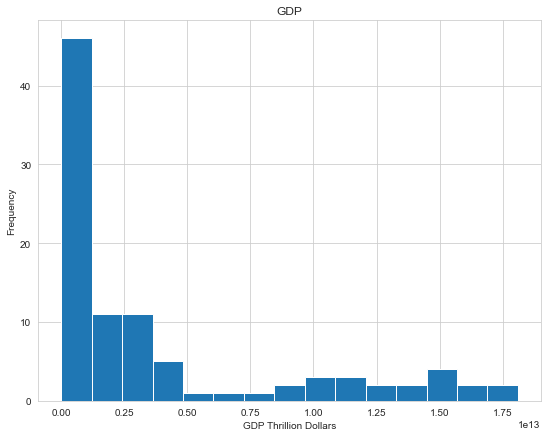

In [27]:
f, ax = plt.subplots(figsize = (9,7))
data.hist(column = 'GDP', bins=15, ax = ax)
ax.set_xlabel('GDP Thrillion Dollars')
ax.set_ylabel('Frequency')
plt.show()


## Has life expectancy increased over time in the six nations?

The scatterplot for the six nations shows that the life expectancy has increase from 2000 to 2015. A Seaprated view for each country can show better the behavior of life expectancy.

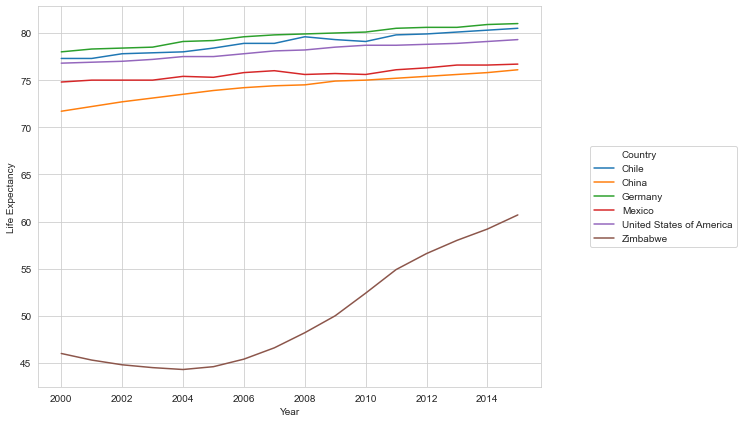

In [28]:
f, ax = plt.subplots(figsize=(9,7))
g = sns.lineplot(data = data, x = 'Year', y = 'life_exp', hue = 'Country')
g.set(ylabel = 'Life Expectancy', xlabel = 'Year')
g.legend(loc = 'center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.show()

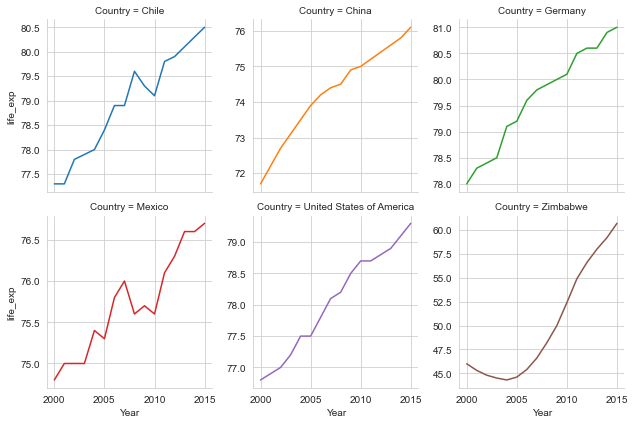

In [29]:
g = sns.FacetGrid(data, col="Country", col_wrap = 3, hue = 'Country', sharey=False)
g.map(sns.lineplot, "Year",'life_exp')
plt.show()

In the former plots is clear that the life expectancy is growing in all the countries but in some ones, like Mexico, Chile and Zombawe, there is periods were the life expectany has dimished.

## Has GDP increased over time in the six nations?

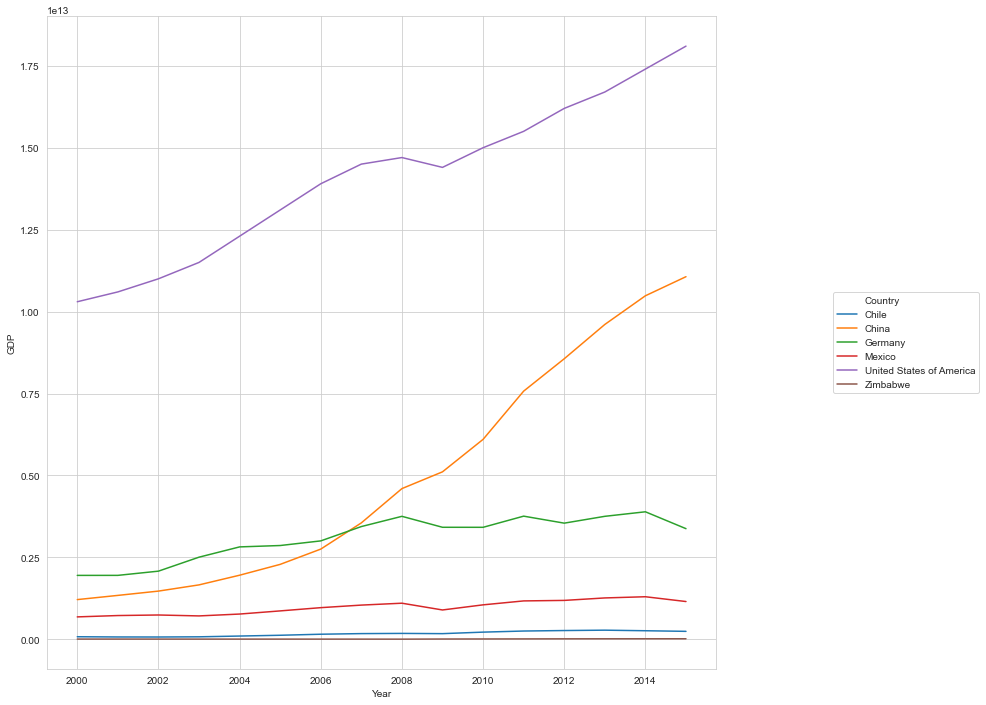

In [30]:
f, ax = plt.subplots(figsize=(12,12))
g = sns.lineplot(data = data, x = 'Year', y = 'GDP', hue = 'Country')
g.set(ylabel = 'GDP', xlabel = 'Year')
g.legend(loc = 'center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.show()

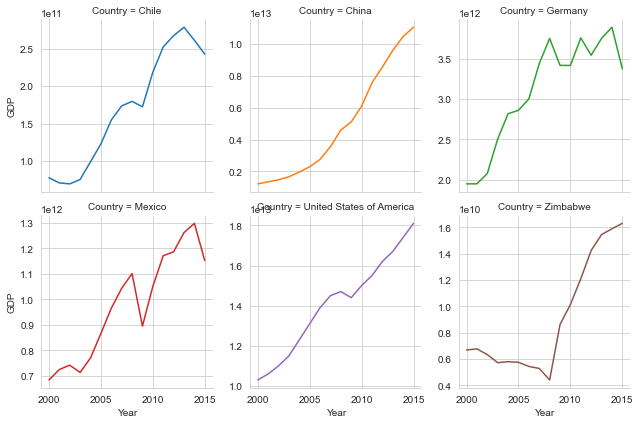

In [31]:
g = sns.FacetGrid(data, col="Country", col_wrap = 3, hue = 'Country', sharey=False)
g.map(sns.lineplot, "Year",'GDP')
plt.show()

The GDP is different in each conutry, China has a sostained grow sice 2000 to 2015 while USA has a little down before 2010. Chile, Germany, Mexico and Zimbawe has growing too but in some periods had abrupt downs. 

## Which countries are below and above the mean GDP?
USA and China are above the meab GDP, Germany, Mexico, Chile and Zimbabwe are below the mean GDP.

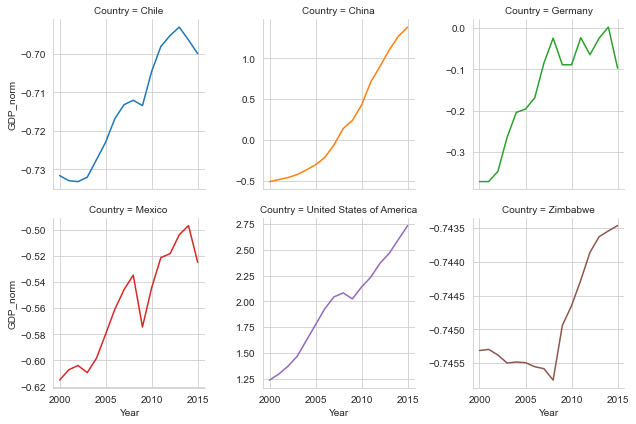

In [32]:
normalized_data = pd.DataFrame( {'Country':data.Country, 'Year':data.Year} )
normalized_data['GDP_norm'] = ( data.GDP - data.GDP.mean() ) / data.GDP.std()

g = sns.FacetGrid(normalized_data , col="Country", col_wrap = 3, hue = 'Country', sharey=False)
g.map(sns.lineplot, "Year",'GDP_norm')
plt.show()

## Which countries are below and above the mean life expectancy?
Just Zimbabwe is below the mean life expectancy, but has a great growing. The rest are above the mean life expectancy. CHina pass from below to above the mean life expectancy.

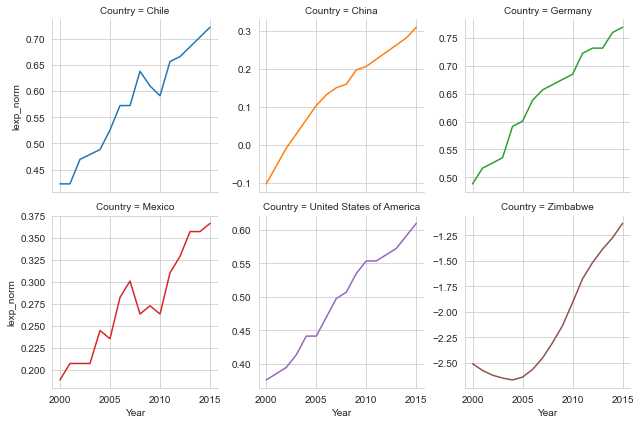

In [33]:
normalized_data['lexp_norm'] = ( data.life_exp - data.life_exp.mean() ) / data.life_exp.std()

g = sns.FacetGrid(normalized_data , col="Country", col_wrap = 3, hue = 'Country', sharey=False)
g.map(sns.lineplot, "Year",'lexp_norm')
plt.show()

## Is there a correlation between GDP and life expectancy of a country?
All the countries present a correlation between GDP and life expectancy, some linear and some non linear, like China.

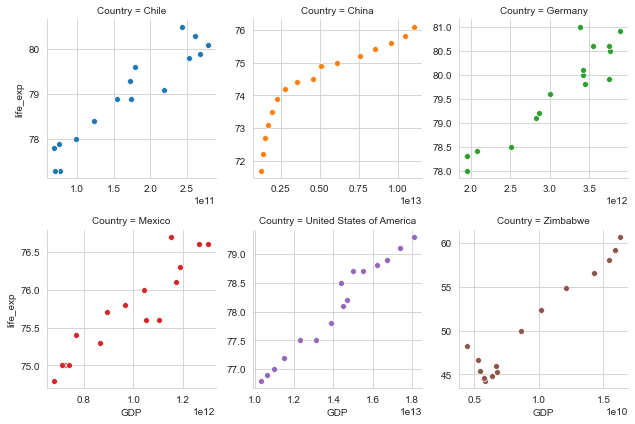

In [34]:
g = sns.FacetGrid(data , col="Country", col_wrap = 3, hue = 'Country', sharey=False, sharex = False)
g.map(sns.scatterplot, "GDP",'life_exp')
plt.show()

## What is the average life expectancy in these nations?


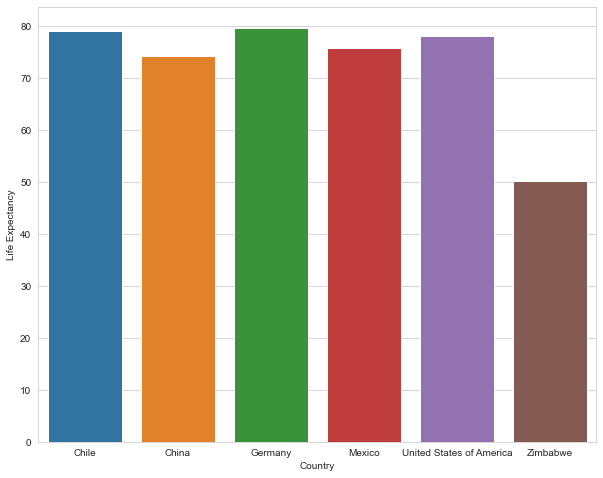

In [35]:
mean_le = data.groupby('Country').mean().reset_index()
f, ax = plt.subplots(figsize=(10,8))
g = sns.barplot(data = mean_le, x = 'Country', y = 'life_exp')
ax.set_ylabel('Life Expectancy')
plt.show()

## What is the distribution of that life expectancy?



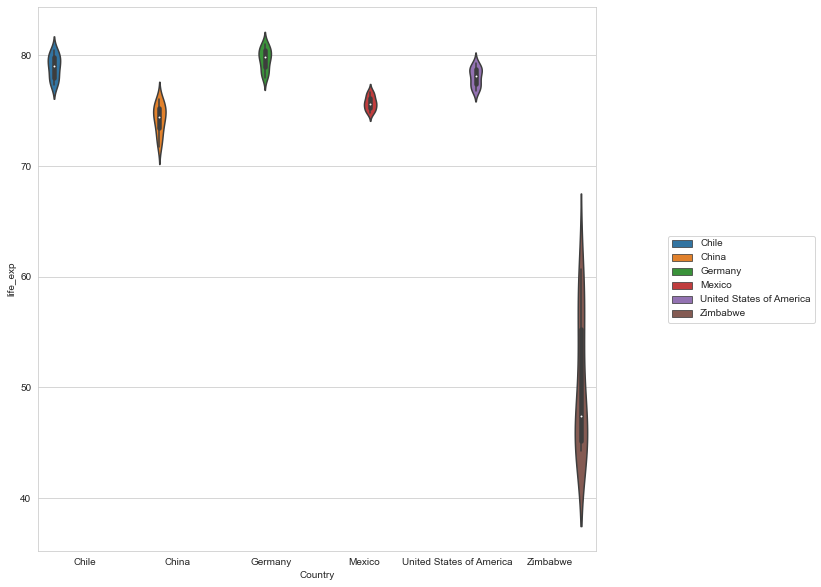

In [40]:
f, ax = plt.subplots(figsize=(10,10))
g = sns.violinplot(data = data, x = 'Country', y = 'life_exp', hue = 'Country')
g.legend(loc = 'center right', bbox_to_anchor=(1.4, 0.5), ncol=1)
plt.show()

## Conclusions
1. The GDP and life expectancy grows for all the countries. 
2. The GDP an life expectancy are related, some times have a linear relations, som times have non linear relation
3. Zimbabwe is the only country that is below the mean life expectancy
4. Zimbabwe, Chile, Mexico and Germany are below the mean GDP